In [ ]:
 import torch
inputs = torch.tensor([
    [0.43, 0.15, 0.89],  # Your       (x^1)
    [0.55, 0.87, 0.66],  # journey    (x^2)
    [0.57, 0.85, 0.64],  # starts     (x^3)
    [0.22, 0.58, 0.33],  # with       (x^4)
    [0.77, 0.25, 0.10],  # one        (x^5)
    [0.05, 0.80, 0.55]   # step       (x^6)
])

In [ ]:
x_2 = inputs[1]  #journey
d_in = inputs.shape[1]  #since it'll be multiplied with inputs(d_in->associated with the no. of rows of key_weight, query_eight, value_weight )
d_out = 2 #can be anything

In [ ]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad =False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad =False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad =False)

In [ ]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [ ]:
print(W_key)

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])


In [ ]:
print(W_value)

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [ ]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [ ]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query


In [ ]:
print("keys.shape:", keys.shape)
print("queries.shape:", queries.shape)
print("valuess.shape:", values.shape)
#6 rows for eac input tokens

keys.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])
valuess.shape: torch.Size([6, 2])


In [ ]:
print(keys)

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])


In [ ]:
print(queries)

tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])


In [ ]:
keys_2 = keys[1]
w_22 = query_2.dot(keys_2)
print(w_22)

tensor(1.8524)


In [ ]:
attn_scores_2 = query_2 @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [ ]:
attn_scores = queries @ keys.T

In [ ]:
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [ ]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2/d_k**0.5, dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


  WHY SCALE BY root(d_k)

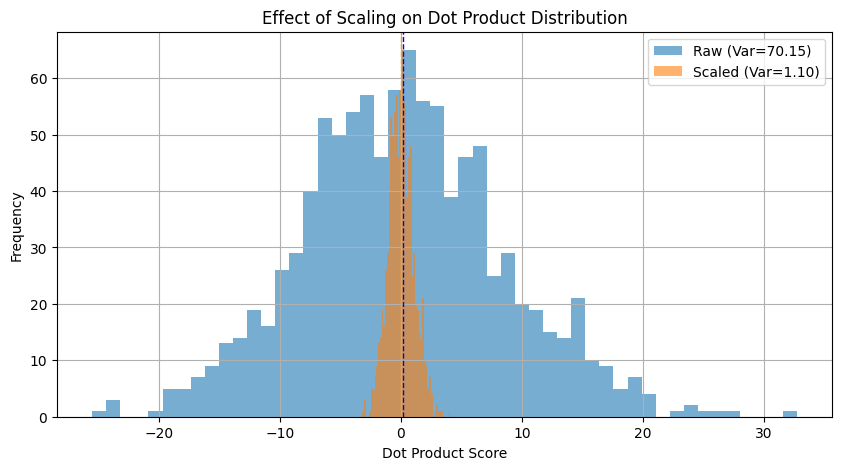

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

# Set random seed for reproducibility
torch.manual_seed(42)

# Define dimensions
batch_size = 1000
d_k = 64  # Key dimension

# Step 1: Generate random Q and K from a normal distribution
Q = torch.randn(batch_size, d_k)
K = torch.randn(batch_size, d_k)

# Step 2: Compute raw attention scores (dot product of each Q[i] · K[i])
raw_scores = torch.sum(Q * K, dim=1)  # shape: [batch_size]

# Step 3: Scale the scores
scaled_scores = raw_scores / math.sqrt(d_k)

plt.figure(figsize=(10, 5))
plt.hist(raw_scores.numpy(), bins=50, alpha=0.6, label=f'Raw (Var={raw_scores.var():.2f})')
plt.hist(scaled_scores.numpy(), bins=50, alpha=0.6, label=f'Scaled (Var={scaled_scores.var():.2f})')
plt.axvline(raw_scores.mean(), color='blue', linestyle='--', linewidth=1)
plt.axvline(scaled_scores.mean(), color='orange', linestyle='--', linewidth=1)
plt.title('Effect of Scaling on Dot Product Distribution')
plt.xlabel('Dot Product Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
a = torch.tensor([3, 7]).float()
b = torch.softmax(a, dim=-1)
print(b)

tensor([0.0180, 0.9820])


In [ ]:
import torch

# Define the tensor
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Apply softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:", softmax_result)

# Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor * 8):", softmax_scaled_result)

Softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor * 8): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


In [ ]:
import numpy as np

# Function to compute variance before and after scaling
def compute_variance(dim, num_trials=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trials):
        q = np.random.randn(dim)
        k = np.random.randn(dim)

        # Compute dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)

        # Scale the dot product by sqrt(dim)
        scaled_dot_product = dot_product / np.sqrt(dim)
        scaled_dot_products.append(scaled_dot_product)

    # Calculate variance of the dot products
    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_after_scaling

# For dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim=5): {variance_before_5}")
print(f"Variance after scaling (dim=5): {variance_after_5}")

# For dimension 20
variance_before_100, variance_after_100 = compute_variance(100)
print(f"Variance before scaling (dim=100): {variance_before_100}")
print(f"Variance after scaling (dim=100): {variance_after_100}")



Variance before scaling (dim=5): 5.8066916184264175
Variance after scaling (dim=5): 1.1613383236852832
Variance before scaling (dim=100): 93.35770706125268
Variance after scaling (dim=100): 0.933577070612527


In [ ]:
context_vect_2 = attn_weights_2 @ values
print(context_vect_2)   #z(2)

tensor([0.3061, 0.8210])


IMPLEMENTING THE SELF ATTN CLASS

In [ ]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):

  def __init__(self, d_in, d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in, d_out))
    self.W_key = nn.Parameter(torch.rand(d_in, d_out))
    self.W_value = nn.Parameter(torch.rand(d_in, d_out))

  def forward(self, x):
    K = x @ W_key
    Q = x @ W_query
    V = x @ W_value

    attn_scores = Q @ K.T
    attn_weights = torch.softmax(attn_scores/K.shape[-1]**0.5, dim=-1)
    context_vector = attn_weights @ V
    return context_vector

In [ ]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print("Context_vector =",   sa_v1(inputs))

Context_vector = tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [ ]:
import torch.nn as nn
class SelfAttention_v2(nn.Module):

  def __init__(self, d_in, d_out, qkv_bias=False):
    super().__init__()
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

  def forward(self, x):
    K = x @ W_key
    Q = x @ W_query
    V = x @ W_value

    attn_scores = Q @ K.T
    attn_weights = torch.softmax(attn_scores/K.shape[-1]**0.5, dim=-1)
    context_vector = attn_weights @ V
    return context_vector

In [ ]:
torch.manual_seed(123)
sa_v2 = SelfAttention_v2(d_in, d_out)
print("Context_vector =",   sa_v2(inputs))

Context_vector = tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [ ]:
import torch
inputs = torch.tensor([
    [0.43, 0.15, 0.89],  # Your       (x^1)
    [0.55, 0.87, 0.66],  # journey    (x^2)
    [0.57, 0.85, 0.64],  # starts     (x^3)
    [0.22, 0.58, 0.33],  # with       (x^4)
    [0.77, 0.25, 0.10],  # one        (x^5)
    [0.05, 0.80, 0.55]   # step       (x^6)
])

HIDING FUTURE WORDS WITH CAUSAL ATTENTION
[link text](https://)

In [ ]:
Q = sa_v2.W_query(inputs)
K = sa_v2.W_key(inputs)
attn_scores = Q @ K.T
attn_weights = torch.softmax(attn_scores/K.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1717, 0.1762, 0.1761, 0.1555, 0.1627, 0.1579],
        [0.1636, 0.1749, 0.1746, 0.1612, 0.1605, 0.1652],
        [0.1637, 0.1749, 0.1746, 0.1611, 0.1606, 0.1651],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.1639],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


In [ ]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1717, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1637, 0.1749, 0.1746, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<MulBackward0>)


In [ ]:
rows_sum = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple/rows_sum
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<DivBackward0>)


BETTER APPROACH(SAVES DATA LEAKEAGE)

In [ ]:
print(attn_scores)

tensor([[0.3111, 0.3479, 0.3471, 0.1714, 0.2350, 0.1928],
        [0.1655, 0.2602, 0.2576, 0.1445, 0.1384, 0.1790],
        [0.1667, 0.2602, 0.2577, 0.1443, 0.1391, 0.1784],
        [0.0510, 0.1080, 0.1064, 0.0643, 0.0476, 0.0835],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121, 0.1174],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MmBackward0>)


In [ ]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1667, 0.2602, 0.2577,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1064, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)


-inf telss that brother there is no fucking relation btween the two elements that yu looking at

In [ ]:
attn_weights = torch.softmax(masked/ K.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


DROPOUT IMPLEMENTATION

In [ ]:
example = torch.ones(6,6)
print(example)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
print(dropout(example))

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [ ]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0335, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6804, 0.0000, 0.0000, 0.0000],
        [0.4889, 0.5090, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3988, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3418, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


# IMPLEMENTING THE CAUSAL ATTENTION CLASS IN PYTHON **(MULTIPLE BATCHES)**

In [ ]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [ ]:
print(batch)

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


In [ ]:
class CausalAttention(nn.Module):

  def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
    super().__init__()
    self.d_out = d_out
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

  def forward(self, x):
    b, num_tokens, d_in = x.shape
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    attn_scores = queries @ keys.transpose(1, 2)  #1st and second dimension not 0th
    attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
    )

    attn_weights = self.dropout(attn_weights)

    context_vector = attn_weights @ values
    return context_vector

In [ ]:
print(d_in, d_out)

3 2


In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)
print(context_vecs)

context_vecs.shape: torch.Size([2, 6, 2])
tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


# EXTENDING SINGLE HEAD ATTENTION TO MULTIPLE-HEAD ATTENTION

In [ ]:
class MultiHeadAttentionWrapper(nn.Module):

  def __init__(self, d_in, d_out, contex_length, dropout, num_heads, qkv_bias = False):
    super().__init__()
    self.heads = nn.ModuleList(
        [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
        for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim=-1)

In [ ]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)
print(batch)

torch.Size([2, 6, 3])
tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


In [ ]:
inputs = torch.tensor([
    [0.43, 0.15, 0.89],  # Your       (x^1)
    [0.55, 0.87, 0.66],  # journey    (x^2)
    [0.57, 0.85, 0.64],  # starts     (x^3)
    [0.22, 0.58, 0.33],  # with       (x^4)
    [0.77, 0.25, 0.10],  # one        (x^5)
    [0.05, 0.80, 0.55]   # step       (x^6)
])

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs  = mha(batch)
print(context_vecs)
print(context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
torch.Size([2, 6, 4])


# IMPLEMENTING MULTI-HEAD ATTENTION WITH WEIGHT SPLITS

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec